Buying Microsoft for 1586.4070129394531 USD
Buying CISCO for 870.9780120849609 USD


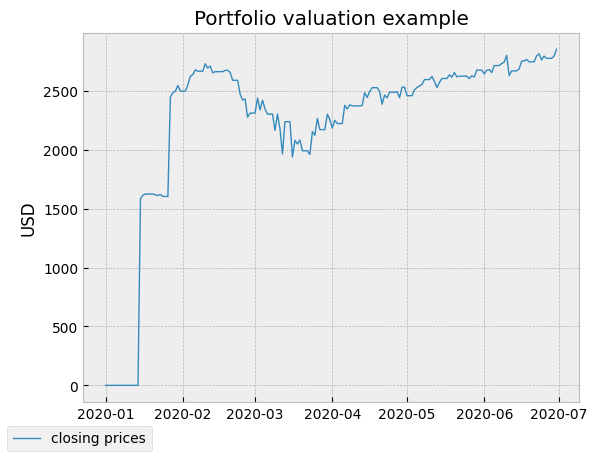

In [3]:
# Sample portfolio
# This sample code creates a portfolio with some undated transactions 
# We are demonstrating how shares are accumulated in the portfolio

from Portfolios import *
from TimeSeries import TimeSeries
import matplotlib.pyplot as plt 

p:Portfolio = Portfolio()
#Buying 10 shares of Microsoft on 15th of Jan 2020 at 15:00
msft_value = p.buy('MSFT', 10, datetime(2020,1,15), eval=True)
print(f"Buying Microsoft for {msft_value} USD")
#Buying another 20 shares of CISCO on the 27 of Jan
csco_value = p.buy('CSCO', 20, datetime(2020,1,27), eval=True)
print(f"Buying CISCO for {csco_value} USD")
# graph the resulting portfolio in the first harlf of 2020
close_ts = p.valuator().get_valuations(datetime(2020,1,1), datetime(2020,6,30))
dates = pd.date_range(close_ts.get_start_date(), close_ts.get_end_date(), freq='D')
# And we graph the data with style
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.set_title("Portfolio valuation example")
ax.set_ylabel("USD")
close_line, = ax.plot(dates, close_ts.get_full_time_series(), linewidth=1)
fig.legend((close_line,), ('closing prices',), loc='lower left')
# Will show how the 2 transaction have affected the portfolio value at the beginning of the year and the evolution of these transactions with market prices over time
plt.show()

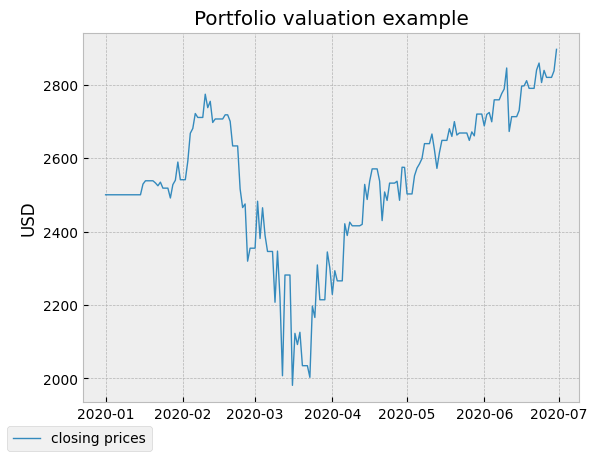

In [4]:
# Now let's add enough cash at the beginning of the portfolio's life to buy these two positions at the beginning of the year
p.add("USD", 2500)
# and remove the cash needed to buy the stocks
p.withdraw("USD", msft_value, datetime(2020,1,15))
p.withdraw("USD", csco_value, datetime(2020,1,27))
# Regrapth
close_ts = p.valuator().get_valuations(datetime(2020,1,1), datetime(2020,6,30))
dates = pd.date_range(close_ts.get_start_date(), close_ts.get_end_date(), freq='D')
# And we graph the data with style
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.set_title("Portfolio valuation example")
ax.set_ylabel("USD")
close_line, = ax.plot(dates, close_ts.get_full_time_series(), linewidth=1)
fig.legend((close_line,), ('closing prices',), loc='lower left')
# Will show how the 2 transaction have affected the portfolio value at the beginning of the year and the evolution of these transactions with market prices over time
plt.show()

In [5]:
from Portfolios import PortfolioGroup, Portfolio
# In this second example we are creating a group of portfolios.
# Investments can be placed in different portfolios and we can report on the different portfolios separately and on the group of portfolios as well
# This can be useful to manage and/or combine separate accounts

pg:PortfolioGroup = PortfolioGroup("My Investments")
p2:Portfolio = Portfolio("My cash")
p2.add('USD', 67000)
p2.add('CHF', 480000)
pg.add(p)
pg.add(p2)
pg

Portfolio Group My Investments containing 2 portfolios: 
Portfolio DEFAULT 
2500 Cash USD
Portfolio My cash 
67000 Cash USD
480000 Cash CHF

In [6]:
# I can value a portfolio or a group of portfolios
pg.valuator().get_valuation(date.fromisoformat("2022-09-01"))

560782.9055114831